In [1]:
from pymoo.optimize import minimize
from jobshop.params import job_params_from_json
from jobshop.heuristic.brkga import BRKGA, LSDecoder, JobShopProblem, PhenoDuplicates
from jobshop.heuristic.brkga.termination import TargetTermination

Thesis with target values [link](https://repositorio.ufmg.br/bitstream/1843/33554/1/Tradu%C3%A7%C3%A3o%20Autom%C3%A1tica%20de%20Problemas%20de%20Escalonamento%20Job%20Shop%20Flex%C3%ADvel%20com%20Bloqueio%20para%20Aut%C3%B4matos%20Utilizando%20a%20Teoria%20de%20Controle%20Supervis%C3%B3rio%20-%20PDF_A.pdf)

In [2]:
params = job_params_from_json("./../instances/orlib/mt10.json")

In [3]:
brkga = BRKGA(
    pop_size=150,
    perc_elite=0.2,
    perc_mutants=0.1,
    bias=0.85,
    eliminate_duplicates=PhenoDuplicates(min_diff=0.1),
)
problem = JobShopProblem(params, LSDecoder)

In [4]:
res = minimize(problem, brkga, termination=TargetTermination(1000, 930), verbose=True, seed=42)

n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |      150 |  1.299613E+03 |  1.117000E+03
     2 |      270 |  1.250260E+03 |  1.117000E+03
     3 |      390 |  1.225718E+03 |  1.103000E+03
     4 |      510 |  1.221767E+03 |  1.053000E+03
     5 |      630 |  1.212812E+03 |  1.042000E+03
     6 |      750 |  1.212638E+03 |  1.042000E+03
     7 |      870 |  1.205993E+03 |  1.042000E+03
     8 |      990 |  1.197400E+03 |  1.042000E+03
     9 |     1110 |  1.170107E+03 |  1.022000E+03
    10 |     1230 |  1.158862E+03 |  1.022000E+03
    11 |     1350 |  1.158735E+03 |  1.022000E+03
    12 |     1470 |  1.143293E+03 |  1.018000E+03
    13 |     1590 |  1.135612E+03 |  9.820000E+02
    14 |     1710 |  1.124054E+03 |  9.820000E+02
    15 |     1830 |  1.126469E+03 |  9.820000E+02
    16 |     1950 |  1.112952E+03 |  9.820000E+02
    17 |     2070 |  1.112163E+03 |  9.820000E+02
    18 |     2190 |  1.103192E+03 |  9.820000E+02
    19 |     2310 |  1.116364E+03 |  9.820000E+02


In [5]:
graph = problem.decoder.build_graph_from_string(res.X)

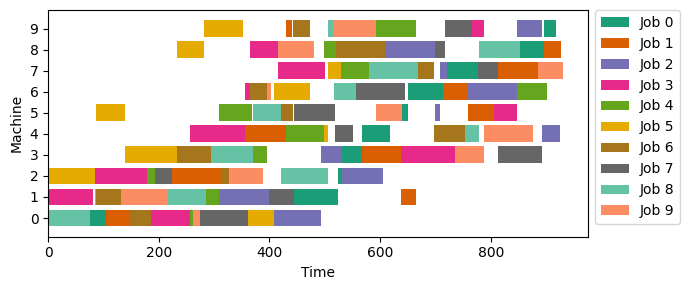

In [6]:
graph.plot()